# <center> WEB SCRAPING & and sentiment analysis WITH python </center>

# 1-SCRAPING

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

In [3]:
from selenium.webdriver.chrome.options import Options

### On se connecter a une instance de chrome (chromedriver)   

In [5]:
# options = Options()
# # driver = webdriver.Chrome(options=options)
# driver = webdriver.Chrome(options=options,executable_path="/home/hennani/Downloads/chromedriver_linux64/chromedriver")

In [197]:
driver = webdriver.Chrome("/home/hennani/Downloads/chromedriver_linux64/chromedriver")

/tmp/ipykernel_33407/1290459061.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/home/hennani/Downloads/chromedriver_linux64/chromedriver")


La methode get de driver  pour accéder ou site web 'https://www.tripadvisor.com/'

In [4]:
driver.get("https://www.tripadvisor.com/")

In [127]:
print(driver.current_url)

https://www.tripadvisor.com/


L'envoi d'une requete de rerecherch ('Marrakech'),pour cela on doit tout d'abors localiser la bare de rcherch dons la page par son PATH

(//*[@id="lithium-root"]/main/div[3]/div/div/div[2]/form/input[1]) 

In [45]:
time.sleep(3)# pour s'assure que la page et completenmet telechrgee 
xpath='//*[@id="lithium-root"]/main/div[3]/div/div/div[2]/form'
inputElement = driver.find_element(by=By.XPATH,value=xpath)

La methde send_keys() pour passe "Marrackech" as string 

In [181]:
inputElement.send_keys('Marrakech')
time.sleep(3)
inputElement.send_keys(Keys.RETURN)

In [123]:
print(driver.current_url)

https://www.tripadvisor.com/Attractions-g293734-Activities-Marrakech_Marrakech_Safi.html


In [183]:
xpath1='//*[@id="search-filters"]/ul/li[2]/a'
driver.find_element(by=By.XPATH,value=xpath1).click()

In [17]:
print(driver.current_url)

https://www.tripadvisor.com/Search?q=Marrakech&searchSessionId=BF1DDE8DBDDFB630752C121ECAE667DB1667682135323ssid&searchNearby=false&sid=8B76F5ACCBE14EEFB0E5625614E9AA861667682320030&blockRedirect=true&geo=1&ssrc=h&rf=1


# Extraction des liens des hôtes :
Parcourir les 6 premières pages, chacune contenant 30 hôtels, afin de recueillir leurs liens et les ajouter à une liste (liens=[]).
En utilisant deux chemins XPath : xpath_next pour passer à la page suivante et xpath_link pour localiser l'élément contenant le lien de l'hôtel.
Une fois que nous avons localisé la classe, nous utiliserons la méthode get_attribute('onclick') pour extraire le contenu de l'attribut onclick qui contient le lien de l'hôtel."


In [6]:
xpath_next='//*[@id="BODY_BLOCK_JQUERY_REFLOW"]/div[2]/div/div[2]/div/div/div/div/div[1]/div/div[1]/div/div[3]/div/div[2]/div/div/div/a[2]'

xpatha_link='//*[contains(@class,"result-title")]'

links=[]
for i in range(6):
    time.sleep(2)
    print(i)
    element1=driver.find_elements(by=By.XPATH,value=xpatha_link)
    for element in element1:
        tx_lin=element.get_attribute('onclick')
        aplit_link1=tx_lin.split("widgetEvCall('handlers.openResult', event, this, '")
        aplit_link2=aplit_link1[1].split("'")
        line='https://www.tripadvisor.com'+aplit_link2[0]
        links.append(line)
        

    driver.find_element(by=By.XPATH,value=xpath_next).click()
    driver.get(driver.current_url)




0
1
2
3
4
5


## save Links in Json file 

In [135]:
import json
    
# Data to be written

with open("data.json", "w") as outfile:
    json.dump(links, outfile)
# dat=pd.read_json('links.json')

### Declaration des variables contenant les XPATH des different element a scraper

In [114]:
xp_title='//*[@id="HEADING"]'
xp_addre='//*[@id="component_3"]/div/div/div[2]/div/div[2]/div/div[1]/div/span[2]/span'
xp_tel="//span[@class='zNXea NXOxh NjUDn']"
xp_Room_types='//*[@id="ABOUT_TAB"]/div[2]/div[2]/div[1]/div[8]'
xp_Property_amenities='//*[@id="ABOUT_TAB"]/div[2]/div[2]/div[1]/div[2]'
xp_Room_features='//*[@id="ABOUT_TAB"]/div[2]/div[2]/div[1]/div[5]'
xp_hotel_lang='//*[@id="ABOUT_TAB"]/div[2]/div[2]/div[3]/div[2]/div/div[2]'
xp_price='//*[@id="component_4"]/div/div[1]/div[1]/div[1]/div[2]/div/div'
xp_nbRevies='//*[@id="component_3"]/div/div/div[1]/div[2]/a/span[2]'
xp_rat='//*[@id="ABOUT_TAB"]/div[2]/div[1]/div[1]/span'#mumber of rating len()
xp_num="//div[@class='cGAqf']/a/span"
rv_next='//*[@id="component_16"]/div/div[3]/div[13]/div/a'
xp_pp='//*[@id="component_16"]/div/div[3]'
xp_clss='//*[@id="component_16"]/div/div[3]/div[8]/div[2]/div[3]/div[1]/div[1]/q/span'
xp_rev='div/div[2]/div[3]/div[1]/div[1]/q/span'
pp='//*[@id="component_16"]/div/div[3]/div[13]/div'
nn='//*[@id="component_16"]/div/div[3]/div[13]/div/a'
xp_next='//*[@id="component_16"]/div/div[3]/div[13]/div/a'

In [1]:
# ele5=driver.find_elements(by=By.XPATH,value=xp_Room_features)
# ll=[]
# for i in ele5:
#     print(i.text)
#     ll.append(i.text)
# print(ll[0].split('/'))
# print(ll[0].split('\n'))



### Dans ce bloc qui suit, nous allons définir les fonctions que nous utiliserons par la suite :

    La fonction "check_exists_by_xpath" est utilisée pour gérer les exceptions. Parfois, certains éléments peuvent être absents lors du scraping pour certains hôtels. Donc à chaque fois avant de localiser un élément, nous testons son existence pour savoir s'il est présent ou non pour un hôtel donné.

    La fonction "get_element" a pour but de retourner l'élément à scraper.

    La fonction "rev_links" permet de récupérer les avis sans cliquer ou de récupérer le lien vers la page suivante des avis (ce qui est plus lourd). Cette méthode prend en paramètre le lien d'un hôtel et sera utilisée pour générer les liens. En effet, on peut remarquer que le passage d'une page à une autre se fait en ajoutant "or10, or20, or30..." (or10 correspond à la deuxième page, or20 à la troisième page, etc.).



#### https://www.tripadvisor.com/Hotel_Review-g488109-d483821-Reviews-Kasbah_Du_Toubkal-Imlil_Marrakech_Safi.html
 
#### https://www.tripadvisor.com/Hotel_Review-g488109-d483821-Reviews-or10-Kasbah_Du_Toubkal-Imlil_Marrakech......._

#### https://www.tripadvisor.com/Hotel_Review-g488109-d483821-Reviews-or20-Kasbah_Du_Toubkal-Imlil_Marrakech......._

  

In [135]:
from selenium.common.exceptions import NoSuchElementException        
def check_exists_by_xpath(xpath):
    try:
        driver.find_element(by=By.XPATH,value=xpath)
    except NoSuchElementException:
        return False
    return True


def get_element(Xpath):
        if check_exists_by_xpath(Xpath):
             elemene=driver.find_element(by=By.XPATH,value=Xpath).text
        else:
             elemene=''
        return elemene
def(Xpath):
    if check_exists_by_xpath(Xpath):
        li1=[]
        elemenets=driver.find_elements(by=By.XPATH,value=Xpath)
        for i in elemenets:
            li1.append(i.text)
        list_elemenets=li1[0].split('/')
        list_elemenets=li1[0].split('\n')
    else:
        list_elemenets=''
    return list_elemenets
    
def rev_links(link):
    link=link.split('Reviews')
    li=[]
    for j in range(0,410,10):
    #         print(j)
    
        if j==0:

            l=link[0]+'Reviews'+link[1]
            li.append(l)
      
        else:
            l=link[0]+'Reviews''-or'+str(j)+link[1]
    
            li.append(l)
            
    return li


### dict:{} et  lis=[]
#### dict:{} ====> on va stocker les information scraper pour chaque hotel (title,...,reviews)
#### lis=[]  ====> on va l'ajouter achaque foi l'objet dict 
#### lis : est une liste qui va contient tout les hotels 
 

In [2]:
liss=[]
dict1={}

In [216]:
for i in range(0,130):
    print('hot=====>',i)
    data=[]
    
    # la list des lien de reviws de l'hotel i
    link_revs=rev_links(links[i])
    
    
    driver.get(links[i])
#     time.sleep(1)
    get_element()
    if check_exists_by_xpath("//div[@class='cGAqf']/a/span"):
        ele9=driver.find_element(by=By.XPATH,value="//div[@class='cGAqf']/a/span").text
    else:
        ele9=''
    print(ele9)
    get_element()
    if check_exists_by_xpath("//span[@class='zNXea NXOxh NjUDn']"):
        ele2=driver.find_element(By.XPATH, "//span[@class='zNXea NXOxh NjUDn']").text
    else:
        ele2=''
    print(ele2) 
    ele1=get_element(xp_title)

    ele3=get_element(xp_addre)
    
    ele4=get_elements(xp_Property_amenities)
    
    ele4_1=get_elements(xp_Room_types)

    ele5=get_elements(xp_Room_features)

    ele6=get_element(xp_price)

    ele7=get_element(xp_nbRevies)
    
    ele8=get_element(xp_rat)

    # la list des lien de reviws de l'hotel i
    link_revs=rev_links(links[i])
    
    for j in range(len(link_revs)):
        
        print('next_revs=======>',j)
        rev=[]
        driver.get(link_revs[j])
        if check_exists_by_xpath(xp_clss):
            revs=driver.find_element(by=By.XPATH,value=xp_pp).find_elements(by=By.XPATH,value=xp_rev)
            for rv in revs:

                revws.append(rv.text)

        else:
            rev=''        
    #  on essayer de prendre les nbReviews sans répétition
    revws=list(set(revws))
    

    dict1={'title':ele1,
          'tel':ele2,
          'address':ele1,
          'style':ele4,
          'langue':ele5,
          'price':ele6,
          'rating':ele8,
          'nbReviews':ele7,
          'num':ele9,
          'reviews':revws
         }
    
    liss.append(dict1)

# 2.PROPRIETES AND PREPOCESSING OF DATA

## stocker le data en fichier json

In [2]:
import json
    
# Data to be written

with open("data_v2.json", "w") as outfile:
    json.dump(liss, outfile)

In [3]:
import pandas as pd 

data=pd.read_json('data_v2.json')


In [535]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      122 non-null    object 
 1   tel        122 non-null    object 
 2   address    122 non-null    object 
 3   style      122 non-null    object 
 4   langue     122 non-null    object 
 5   price      122 non-null    object 
 6   rating     122 non-null    float64
 7   nbReviews  122 non-null    object 
 8   num        122 non-null    object 
 9   reviews    122 non-null    object 
dtypes: float64(1), object(9)
memory usage: 9.7+ KB


In [ ]:
# notre data contient 122 hotels

In [250]:

dat1=[]
for i in range(129):
    
    dat1.append(len(data['reviews'][i]))
dt=pd.DataFrame(dat1,columns=['Numbers'])
    
    

### les reviews 

In [251]:
dt.describe()

,Numbers
count,129.000000
mean,255.186047
std,63.943184
min,55.000000
25%,212.000000
50%,272.000000
75%,304.000000
max,369.000000


## Rating

In [237]:
# for i in range(129)
data['rating'].describe()

count    129.000000
mean       4.740310
std        0.395782
min        3.000000
25%        4.500000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [222]:
data['title'].describe()

count                  129
unique                 129
top       Riad Kheirredine
freq                     1
Name: title, dtype: object

### Se basent sur le titre pour s'assurer que on a pas des doublant au nivaux des hotels

In [215]:
nbR=[]

for i in range(129):
    nbR.append(len(liss[i]['reviews']))


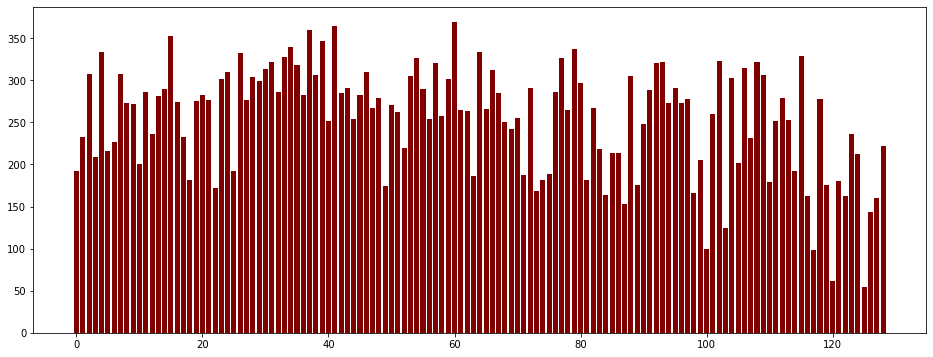

In [214]:
from matplotlib.pyplot import figure

# figure(, dpi=80)
import numpy as np
import matplotlib.pyplot as plt
# ind=[]
fig = plt.figure(figsize=(16, 6))
# [ind.append(i) for i in range(len(nbR)) ]
# ind
plt.bar(ind,nbR,color ='maroon')
 
plt.show()

Le graphique en barres montre le nombre de reviews par hôtel. On peut clairement constater que la majorité des hôtels ont dépassé les 160 critiques par hôtel.

In [236]:
count=0
for i in range(129):
    if len(liss[i]['reviews'])>160:
        count+=1
count   

121

 ## 121 ont plus de 160 reviews 
##### Dans la partie suivant on va essayer de perndre les hotels qui ayant plus 160 et pour les hotels qui depasse 200 ova se limite sur 200 les premier reviews  

In [273]:
final_list=[]

for i in range(129):
#     print(i)
    if len(liss[i]['reviews'])>=160 and len(liss[i]['reviews'])<=200:
        final_list.append(liss[i])
    elif len(liss[i]['reviews'])>=160 and len(liss[i]['reviews'])>200:
            c=liss[i]['reviews'][:200]
            aa=liss[i]
            aa['reviews']=c
            final_list.append(aa)
            
    else:
        print('pour ce hotel le nbr de reviews est inf  a 160')


pour ce hotel le nbr de reviews est inf  a 160
pour ce hotel le nbr de reviews est inf  a 160
pour ce hotel le nbr de reviews est inf  a 160
pour ce hotel le nbr de reviews est inf  a 160
pour ce hotel le nbr de reviews est inf  a 160
pour ce hotel le nbr de reviews est inf  a 160
pour ce hotel le nbr de reviews est inf  a 160


In [277]:
# final_list
nbR1=[]
n=len(final_list)
for i in range(n):
    nbR1.append(len(final_list[i]['reviews']))


### Nombre de reviews 

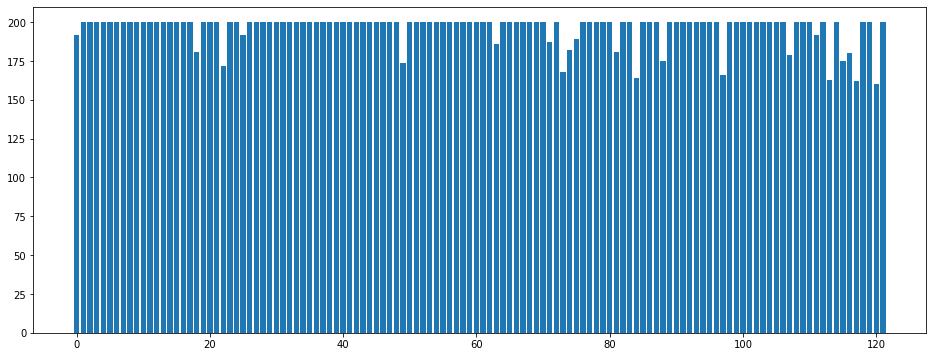

In [280]:
from matplotlib.pyplot import figure

# figure(, dpi=80)
import numpy as np
import matplotlib.pyplot as plt
ind=[]
fig = plt.figure(figsize=(16, 6))
[ind.append(i) for i in range(len(nbR1)) ]
ind
plt.bar(ind,nbR1)
 
plt.show()

In [ ]:
import json
    
# Data to be written

with open("data_final_vr.json", "w") as outfile:
    json.dump(final_list, outfile)
# dat=pd.read_json('links.json')

In [321]:
import pandas as pd 

data=pd.read_json('data_final_vr.json')


In [322]:
data

,title,tel,address,style,langue,price,rating,nbReviews,num,reviews
0,Riad Kheirredine,,Riad Kheirredine,"[Free High Speed Internet (WiFi), Pool, Free b...","[Allergy-free room, Soundproof rooms, Air cond...",,5.0,"2,801 reviews",,[Luxurious accommodation in walking distance t...
1,La Maison Arabe,,La Maison Arabe,"[Paid private parking nearby, Free High Speed ...","[Blackout curtains, Bathrobes, Air conditionin...",,5.0,"3,208 reviews",,[We phoned to book but they then couldn’t find...
2,Riad Dar Anika,,Riad Dar Anika,"[Paid private parking nearby, Free High Speed ...","[Allergy-free room, Bathrobes, Air conditionin...",,5.0,"2,005 reviews",,[Excellent service. Antonio and his staff is t...
3,Riad Kniza,,Riad Kniza,"[Free High Speed Internet (WiFi), Pool, Sauna,...","[Bathrobes, Air conditioning, Housekeeping, Ro...",,5.0,"1,882 reviews",,[We had a wonderful stay at Riad Kniza. The st...
4,Sofitel Marrakech Lounge & Spa Hotel,,Sofitel Marrakech Lounge & Spa Hotel,"[Valet parking, Free High Speed Internet (WiFi...","[Blackout curtains, Soundproof rooms, Air cond...","MAD 3,441",4.5,"4,814 reviews",,[I will start with the breakfast. The food is ...
...,...,...,...,...,...,...,...,...,...,...
117,Riad Shaden,,Riad Shaden,"[Paid private parking nearby, Free High Speed ...","[Air conditioning, Housekeeping, Safe, Private...",MAD 538,5.0,332 reviews,,[We have spent our 9th stay with the team at R...
118,Moroccan House Hotel,,Moroccan House Hotel,"[Paid private parking nearby, Free High Speed ...","[Air conditioning, Safe]",MAD 373,3.5,672 reviews,,[Got back last night from a week in Marrakech ...
119,Palais Sebban,,Palais Sebban,"[Free High Speed Internet (WiFi), Pool, Free b...","[Air conditioning, Private balcony, Room servi...",,4.5,858 reviews,,"[Myself and husband had a 2 night stay, we wer..."
120,Riad Romance,,Riad Romance,"[Free High Speed Internet (WiFi), Pool, Free b...","[Air conditioning, Room service, Safe]",,5.0,396 reviews,,"[, It was our first time visiting Marrakesh an..."


In [ ]:
import matplotlib.pyplot as plt

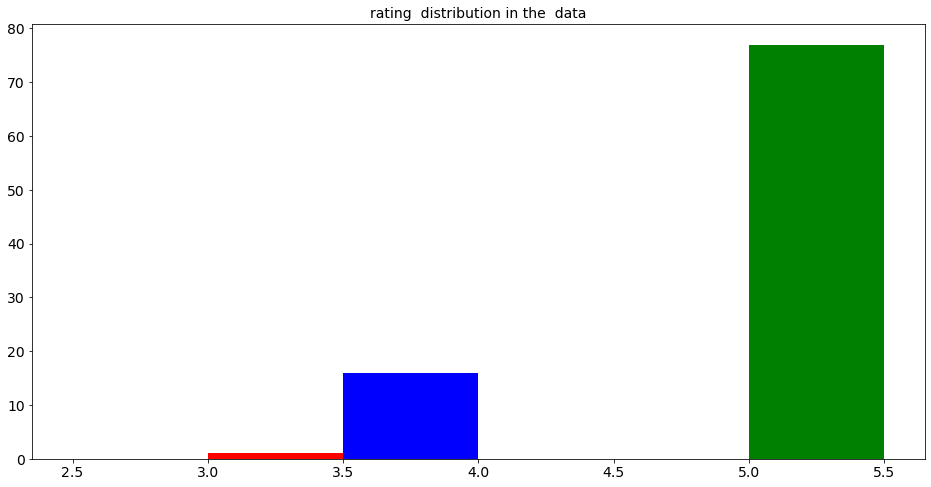

In [724]:
SIZE=20
plt.hist(data[data.rating ==5].rating,
         bins=2, color='green', label='MORE THAN 4 STARS')

plt.hist(data[data.rating <=4].rating,
         bins=2, color='blue', label='less THAN 4 STARS')


plt.hist(data[data.rating ==3].rating,
         bins=2, color='red', label='3 STARS')

plt.title('rating  distribution in the  data')

plt.show()

# 3-LOAD DATA TO POSTGRES DATA BASE

In [ ]:
2. load data to postgres data base 
pour cela on va utiliser la bib psycopg2 afin de se connecter a la base de donnees

# Pui on va instancier an objet du cursor qui va permettre la comminucation avec notre base 
# par l'execution des requete

In [4]:
import psycopg2

In [686]:
# Connecter a   PostgreSQL 
conn = psycopg2.connect(host="localhost", port="5432", dbname="hotels", user="postgres", password="pass1234")

# creation de l'objet cursor 
cur = conn.cursor()


### apre que nous avons écrit notre base de donnees, on va effectuer des requet d'insertion 

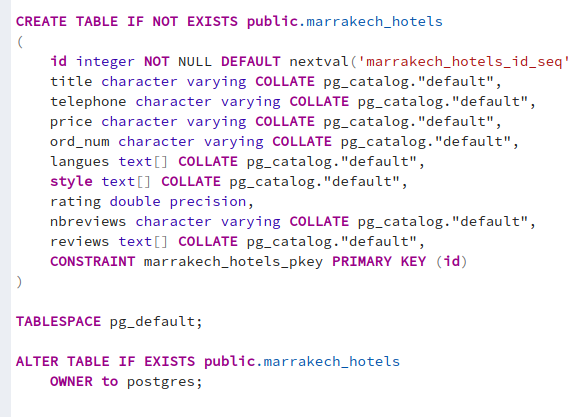

In [ ]:

sql_insert_query = """INSERT INTO marrakech_hotels (title,telephone,style,langues,price,rating,nbreviews,ord_num,reviews) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
for i in range(len(data)):
    values=(data['title'][i],data['tel'][i],data['style'][i],data['langue'][i],data['price'][0],data['rating'][i],data['nbReviews'][i],data['num'][i],data['reviews'][i])
    cur.execute(sql_insert_query, values)
    conn.commit()# save des requete executee

In [688]:
cur.execute("SELECT * FROM marrakech_hotels")

# records = cur.fetchall()
records = cur.fetchone()
# print(records)
# cur.close()
# conn.close()

In [699]:
# print(records)

#name of the hotel 
records[1]

'Riad Kheirredine'

In [735]:
data.head(2)

,title,tel,address,style,langue,price,rating,nbReviews,num,reviews
0,Riad Kheirredine,,Riad Kheirredine,"[Free High Speed Internet (WiFi), Pool, Free b...","[Allergy-free room, Soundproof rooms, Air cond...",,5.0,"2,801 reviews",,[Luxurious accommodation in walking distance t...
1,La Maison Arabe,,La Maison Arabe,"[Paid private parking nearby, Free High Speed ...","[Blackout curtains, Bathrobes, Air conditionin...",,5.0,"3,208 reviews",,[We phoned to book but they then couldn’t find...


In [1]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.
